In [1]:
import numpy as np


class LinearRegression:
        
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=25, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [3]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)

In [4]:
error = predicted - y_test
error

array([ 18.76245392,   9.81349757, -17.33920634,  -8.39896761,
        25.69102892,   6.81023189, -54.95293757, -49.0675071 ,
       -18.16603355, -10.39029352,  31.01380353,   2.0902137 ,
       -19.73553417,  -3.53710193, -17.32328656,  26.92309672,
         8.62231848,  19.46755282,  38.40644078, -50.72146148])

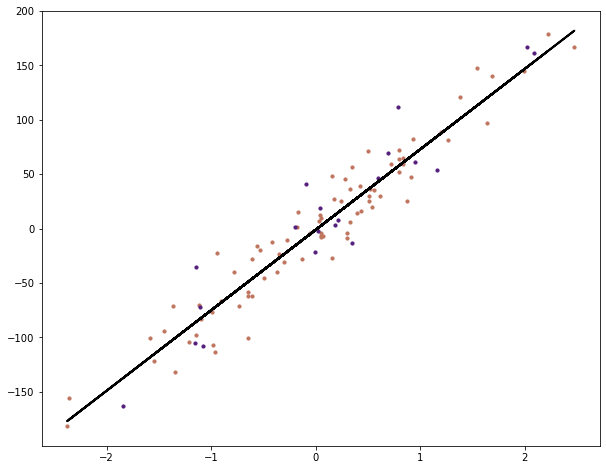

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

y_line = reg.predict(X)
 
cmap = plt.get_cmap('twilight')
fig = plt.figure(figsize=(10,8))
plt.scatter(X_train, y_train, color=cmap(0.8), s=10 )
plt.scatter(X_test, y_test, color=cmap(0.4), s=10 )
plt.plot(X, y_line, color='black', linewidth=2, label='Prediction')
plt.show()